In [486]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [487]:
data = pd.read_csv('./AAPL.csv')
data.set_index('Date', inplace=True)

In [488]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-06,99.949997,100.650002,99.419998,99.620003,91.411026,37051200
2014-10-07,99.430000,100.120003,98.730003,98.750000,90.612694,42094200
2014-10-08,98.760002,101.110001,98.309998,100.800003,92.493782,57404700
2014-10-09,101.540001,102.379997,100.610001,101.019997,92.695656,77376500
2014-10-10,100.690002,102.029999,100.300003,100.730003,92.429558,66331600


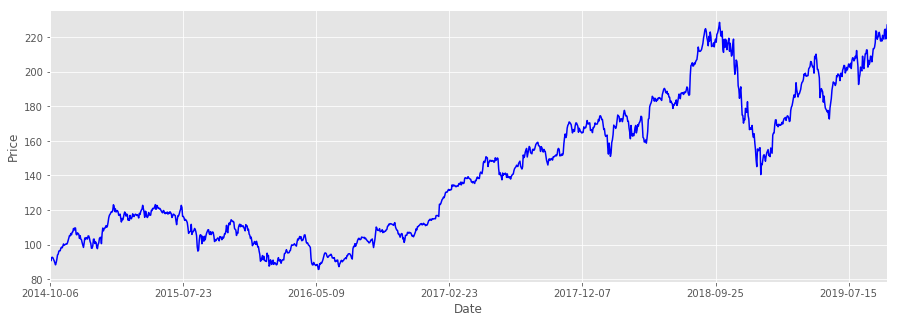

In [489]:
plt.style.use('ggplot')
plt.ylabel('Price')
data['Adj Close'].plot(color='b', figsize=(15,5))
plt.show()

In [509]:
# use 10-day moving average and correlation to make the prediction
data['S_10'] = data['Adj Close'].shift(1).rolling(window=10).mean()
data['Corr'] = data['Adj Close'].rolling(window=10).corr(data['S_10'])
data = data.dropna()
#data = data.fillna(data.mean())
X = data[['S_10', 'Corr']]

In [510]:
X.tail()

,S_10,Corr
Date,,
2019-09-30,219.820000,-0.321262
2019-10-01,220.227000,-0.204909
2019-10-02,220.616000,0.007534
2019-10-03,220.235001,0.159436
2019-10-04,220.221001,-0.033796


In [511]:
# define target variable
y = data['Adj Close']

In [512]:
# split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [513]:
# instantiate linear regression model
linear = LinearRegression().fit(X_train, y_train)

In [514]:
y_test = y_test.sort_values()
X_test = X_test.sort_values(by=['Date'])

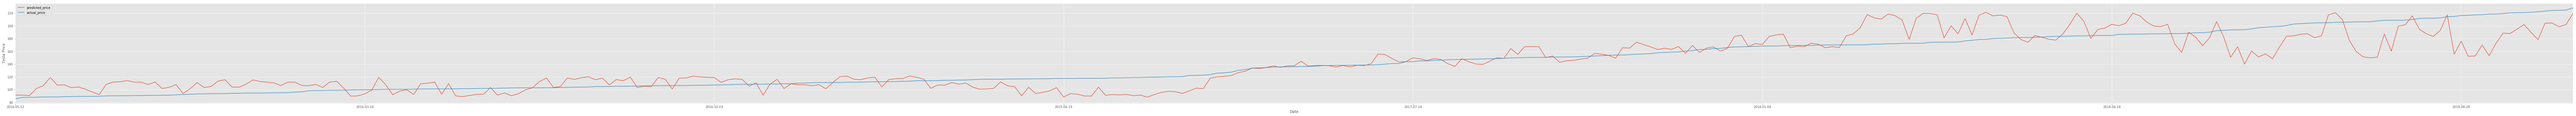

In [515]:
# predict the stock price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index)
predicted_price = predicted_price.sort_values(by=['Date'])

predicted_price.plot(figsize=(150,6))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel('Tesla Price')
# plt.xticks(range(len(data.index)), data.index, rotation=90)
plt.show()

In [516]:
predicted_price.sort_values(by=['Date']).tail(10)

,0
Date,
2019-07-25,188.064395
2019-07-30,195.182694
2019-08-13,202.155330
2019-08-16,189.878546
2019-08-21,178.562417
2019-09-04,204.416417
2019-09-17,204.670961
2019-09-24,198.787996
2019-09-25,202.157620


In [517]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_price))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_price))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_price)))

Mean Absolute Error: 14.486625070977219
Mean Squared Error: 386.83218867385
Root Mean Squared Error: 19.668049945885585
